In [14]:
import pandas as pd
import numpy as np
import operator

In [110]:
df= pd.read_pickle("train_test_cat.pkl.bz2",compression="bz2")

In [405]:
df2= pd.read_pickle("train_test_cat.pkl.bz2",compression="bz2")

In [111]:
df.head().T

,0,1,2,3,4
emp_title_cat,9,9,9,9,9
home_ownership_cat,4,4,4,4,4
loan_status_cat,2,2,2,2,2
job_cat,3,3,3,3,3
purpose_cat,1,1,1,1,1
application_type_cat,0,0,0,0,0
marital_cat,1,1,1,1,1
education_cat,0,0,0,0,0
mf_preference_cat,0,0,0,0,0
scheme_type_cat,38,34,38,36,34


In [112]:
df.drop(columns=["emp_title_cat","home_ownership_cat","job_cat","purpose_cat","scheme_cat_cat","risk_profile","scheme_sub_cat_cat","Risk","application_type_cat","scheme_type_cat","scheme_name","popularity","rank","risk_score_y"],axis=1,inplace=True)

In [113]:
df.head().T

,0,1,2,3,4
loan_status_cat,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
marital_cat,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
education_cat,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mf_preference_cat,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
default_cat,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
housing_cat,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loan_cat,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
member_id,1.296599e+06,1.296599e+06,1.296599e+06,1.296599e+06,1.296599e+06
annual_inc,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04
age,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01


In [145]:
def roi_score(return_val,total_inv):
    roi = (return_val/total_inv)*100
    return roi

In [11]:
def risk_score(risk_freq):
    risk_score=np.sum([risk*freq for risk,freq in risk_freq.items()])/len(risk_freq)
    return risk_score

In [12]:
def time_score(time_freq):
    time_score=np.sum([time*freq for time,freq in time_freq.items()])/len(time_freq)
    return time_score

In [270]:
def diversity_score(mf_types_freq):
    total=np.sum(list(mf_types_freq.values()))
    diversity_score =np.sum([0.2*(freq/total) for mf,freq in mf_types_freq.items()]) 
    return diversity_score

In [195]:
def confidence_score(tenure_amount_dict):
    confidence_score = np.sum([tenure*amount for tenure,amount in tenure_amount_dict.items()])//len(tenure_amount_dict)
    return confidence_score

In [239]:
def investment_score(balance, inv):
     #(xi – min(x)) / (max(x) – min(x)) * 1,00   
    amount_to_invest = (0.15*balance)-inv
    min_value=np.min([balance,inv])      
    max_value=np.max([balance,inv])    
    inv_score=abs((amount_to_invest/min_value)/(max_value-min_value))*100
    investment_score = abs(10-inv_score)
    return investment_score

In [248]:
def credit_score(user_credit):
    #credit_history-total time of loan
    #indebtedness - total money pending for loan
    # open_acc - no. of accounts
    #defaul_payment_hist- time since last default
    credit_score = user_credit["indebtedness"]*0.30+ user_credit["credit_history"]*0.15\
                    +user_credit["open_acc"]*0.10 -user_credit["defaul_payment_hist"]*0.35
    return credit_score

In [276]:
def normalize_list(list_values):
    #(xi – min(x)) / (max(x) – min(x)) * 1,00
    max_val = np.max(list_values)    
    min_val = np.min(list_values)
    normalized_list = [((value-min_val)/(max_val-min_val))*100 for value in list_values]
    return normalized_list

In [21]:
def normalize_dict(val_dict):
    #(xi – min(x)) / (max(x) – min(x)) * 1,00
    values = list(val_dict.values())
    max_val = np.max(values)    
    min_val = np.min(values)
    normalized_dict = {key:((value-min_val)/(max_val-min_val))*100 for (key,value) in val_dict.items()}
    return normalized_dict

In [331]:
def get_lowest_score(score_dict):
    max_score = 100
    list_score ={}
    list_score["roi_score"] = max_score - score_dict["roi_score_sclaed"]
    list_score["risk_score"] = max_score - score_dict["risk_score_sclaed"]
    list_score["time_score"] = max_score - score_dict["time_score_sclaed"]
    list_score["diversity_score"] = max_score - score_dict["diversity_score_sclaed"]
    list_score["confidence_score"] = max_score - score_dict["confidence_score_sclaed"]
    list_score["credit_score"] = max_score - score_dict["credit_score_sclaed"]
    list_score["investment_score"] = max_score - score_dict["investment_score_sclaed"]    
    lowest = max(list_score.items(), key=operator.itemgetter(1))[0]
    return lowest

In [25]:
user = pd.read_csv("loan.csv")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
#payment history
user['defaul_payment_hist']=user['mths_since_last_delinq']+user['delinq_2yrs']

In [63]:
user['defaul_payment_hist'].fillna(0,inplace=True)

In [56]:
#current level of indebtedness
user['indebtedness']=user['out_prncp_inv']/user['funded_amnt_inv']*100

In [57]:
user['indebtedness'].fillna(0,inplace=True)

In [41]:
user['last_pymnt_d']

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [42]:
#Converting the datatype to Datetime
user['last_pymnt_d']=pd.to_datetime(user["last_pymnt_d"],format='%b-%y')
#Converting the datatype to Datetime
user['earliest_cr_line']=pd.to_datetime(user["earliest_cr_line"],format='%b-%y')
#credit history
user['credit_history']=(user['last_pymnt_d']-user['earliest_cr_line'])/np.timedelta64(1, 'D')

In [44]:
user['credit_history'].fillna(0,inplace=True)

In [47]:
user["open_acc"].fillna(1,inplace=True)

In [53]:
user["credit_history"]=user["credit_history"].abs()

In [65]:
np.max(user["defaul_payment_hist"])

120.0

In [64]:
np.min(user["defaul_payment_hist"])

0.0

In [68]:
col_del=["loan_status_cat","marital_cat","education_cat","mf_preference_cat","default_cat","housing_cat","loan_cat","age","emp_length_val","term_val","payment_hist"]

In [66]:
df.head()

,loan_status_cat,marital_cat,education_cat,mf_preference_cat,default_cat,housing_cat,loan_cat,member_id,annual_inc,age,risk_score_x,mf_id,amount,tenure_yr,emp_length_val,term_val,payment_hist,credit_used
0,2,1,0,0,0,0,0,1296599,24000.0,56,2,101186,16153,13,10.0,36,36.508641,10
1,2,1,0,0,0,0,0,1296599,24000.0,56,2,126708,7764,12,10.0,36,36.508641,10
2,2,1,0,0,0,0,0,1296599,24000.0,56,2,119819,11489,18,10.0,36,36.508641,10
3,2,1,0,0,0,0,0,1296599,24000.0,56,2,141288,7467,8,10.0,36,36.508641,10
4,2,1,0,0,0,0,0,1296599,24000.0,56,2,141929,19289,5,10.0,36,36.508641,10


In [114]:
df.drop(columns=col_del,axis=1,inplace=True)

In [115]:
df["member_id"].nunique()

37693

In [288]:
df_credit_data=user[["defaul_payment_hist","credit_history","open_acc","indebtedness"]]

In [ ]:
group_by_columns=[]

In [289]:
df_credit_data=df_credit_data[:37693]

In [290]:
df_credit_data.shape

(37693, 4)

In [291]:
df_credit_data["member_id"]=list(set(df["member_id"]))

In [120]:
df=df.merge(df_credit_data,on="member_id",how="inner")

In [121]:
df.shape

(377051, 11)

In [122]:
mf_return=[14,0.5,-0.01,0,8,20]

In [123]:
df["rate_of_return"] =np.random.choice(mf_return, size=len(df), p=[0.1, 0.05, 0.26, 0.24, 0.20, 0.15])

In [131]:
df.drop(["rate_of_return"],axis=1,inplace=True)

In [124]:
df["mf_return"]=df["amount"]+ (df["rate_of_return"]*df["amount"]*df["tenure_yr"])

In [132]:
for idx,row in df.iterrows():
    df.at[idx,"roi_score"]= roi_score
    break;

member_id              1296599.0
annual_inc               24000.0
risk_score_x                 2.0
mf_id                   101186.0
amount                   16153.0
tenure_yr                   13.0
credit_used                 10.0
defaul_payment_hist         28.0
credit_history            2953.0
open_acc                    16.0
indebtedness                 0.0
mf_return              1696065.0
Name: 0, dtype: float64


In [133]:
df_user=pd.DataFrame()

In [141]:
df_user=df[["member_id","amount","mf_return"]].groupby("member_id").sum()

In [142]:
df_user.reset_index(inplace=True)

In [143]:
df_user.shape

(37693, 3)

In [151]:
for idx,row in df_user.iterrows():
    df_user.at[idx,"roi_score"]= roi_score(row["mf_return"],row["amount"])

In [161]:
set(df["risk_score_x"])

{0, 1, 2, 3, 4, 5}

In [169]:
dict_risk={"member_id":[],"dict_score":[]}
dict_score={"0":0, "1":0, "2":0, "3":0, "4":0, "5":0}
for idx,row in df.iterrows(): 
    print(str(int(row["risk_score_x"])),row["member_id"])
    break

2 1296599.0


In [292]:
df_credit_data["risk_score_dict"]=None

In [293]:
for idx,mem in df_credit_data["member_id"].iteritems():
    df_credit_data.at[idx,"risk_score_dict"]=df[df["member_id"]==mem]["risk_score_x"].value_counts().to_dict()

In [294]:
df_credit_data["risk_score_dict"].head()

0    {3: 16}
1    {1: 17}
2     {0: 9}
3    {1: 15}
4     {5: 6}
Name: risk_score_dict, dtype: object

In [295]:
df_credit_data.head() 

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict
0,0.0,10957.0,3,0.000000,786442,{3: 16}
1,0.0,5114.0,3,0.000000,655371,{1: 17}
2,0.0,4595.0,2,0.000000,917517,{0: 9}
3,35.0,6909.0,10,0.000000,786448,{1: 15}
4,38.0,7426.0,15,17.468667,917526,{5: 6}


In [296]:
df_credit_data["risk_score"]=df_credit_data["risk_score_dict"].apply(lambda x:risk_score(x))

In [297]:
df_credit_data["tenure_yr_dict"]=None

for idx,mem in df_credit_data["member_id"].iteritems():
    df_credit_data.at[idx,"tenure_yr_dict"]=df[df["member_id"]==mem]["tenure_yr"].value_counts().to_dict()

In [298]:
df_credit_data["time_score"]=df_credit_data["tenure_yr_dict"].apply(lambda x:time_score(x))

In [299]:
df_credit_data

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000
...,...,...,...,...,...,...,...,...,...
37688,0.0,2710.0,8,0.000000,1048563,{1: 13},2.166667,"{9: 2, 7: 2, 18: 2, 16: 2, 15: 1, 10: 1, 8: 1,...",17.444444
37689,15.0,4840.0,7,0.000000,917491,{4: 18},12.000000,"{12: 4, 10: 4, 19: 2, 17: 2, 14: 2, 11: 2, 16:...",29.375000
37690,0.0,3137.0,9,0.000000,786424,{0: 18},0.000000,"{15: 3, 14: 3, 6: 3, 12: 2, 11: 2, 18: 1, 13: ...",20.900000
37691,0.0,3318.0,4,0.000000,917498,{2: 8},2.666667,"{14: 1, 13: 1, 12: 1, 9: 1, 7: 1, 6: 1, 18: 1,...",11.875000


In [ ]:
df[["member_id","amount","mf_return"]].groupby("member_id").sum()

In [300]:
df_credit_data["confidence_score_dict"]=None

In [301]:
for idx,mem in df_credit_data["member_id"].iteritems():
    df_credit_data.at[idx,"confidence_score_dict"]= { row["amount"] : row["tenure_yr"] for idx,row in df[df["member_id"]==mem].iterrows()}

In [302]:
df_credit_data.head()

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410..."
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ..."
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339..."
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231..."
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196..."


In [303]:
df_credit_data["confidence_score"]=df_credit_data["confidence_score_dict"].apply(lambda x:confidence_score(x))

In [304]:
df_credit_data.head()

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,confidence_score
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",161045
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",114763
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",108131
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",137301
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",202350


In [207]:
df_credit_data.drop(["risk_score_dict","tenure_yr_dict","confidence_score_dict"],axis=1,inplace=True)

In [208]:
df_user

,member_id,amount,mf_return,roi_score
0,70699,188262,18513717.06,9834.02
1,73673,171992,6379729.20,3709.32
2,74724,49222,4104324.15,8338.39
3,76583,199175,13244497.41,6649.68
4,80353,173393,13308712.67,7675.46
...,...,...,...,...
37688,1306957,93830,10083393.95,10746.4
37689,1311441,169196,11142266.28,6585.42
37690,1311748,5644,5644.00,100
37691,1313524,41217,373821.97,906.961


In [305]:
df_credit_data=df_credit_data.merge(df_user,on="member_id")

In [306]:
df_credit_data

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,confidence_score,amount,mf_return,roi_score
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",161045,180957,19000616.36,10500.1
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",114763,151353,6164841.46,4073.15
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",108131,98831,6680605.95,6759.63
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",137301,174366,12001470.54,6882.92
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",202350,80588,5840161.06,7246.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37688,0.0,2710.0,8,0.000000,1048563,{1: 13},2.166667,"{9: 2, 7: 2, 18: 2, 16: 2, 15: 1, 10: 1, 8: 1,...",17.444444,"{6845: 16, 6945: 18, 6056: 15, 5518: 10, 14224...",91432,110667,3739580.42,3379.13
37689,15.0,4840.0,7,0.000000,917491,{4: 18},12.000000,"{12: 4, 10: 4, 19: 2, 17: 2, 14: 2, 11: 2, 16:...",29.375000,"{17523: 19, 14785: 10, 13429: 12, 5850: 17, 17...",151797,212375,22763660.05,10718.6
37690,0.0,3137.0,9,0.000000,786424,{0: 18},0.000000,"{15: 3, 14: 3, 6: 3, 12: 2, 11: 2, 18: 1, 13: ...",20.900000,"{9657: 14, 11300: 18, 14666: 12, 10788: 8, 181...",140040,223860,14246657.65,6364.09
37691,0.0,3318.0,4,0.000000,917498,{2: 8},2.666667,"{14: 1, 13: 1, 12: 1, 9: 1, 7: 1, 6: 1, 18: 1,...",11.875000,"{15779: 7, 3609: 14, 18620: 12, 9280: 18, 1546...",143840,96389,7711657.10,8000.56


In [307]:
df_credit_data["balance"] =abs(df_credit_data["amount"]+df_credit_data["amount"]*0.5 -10* df_credit_data["indebtedness"]-df_credit_data["credit_history"])

In [308]:
df_credit_data["investment_score"] =investment_score(df_credit_data["balance"],df_credit_data["amount"])

In [309]:
np.min(df_credit_data["investment_score"])

0.00041256351718388373

In [310]:
df_credit_data["credit_score"]=0

In [311]:
df_credit_data["credit_score"]=credit_score(df_credit_data)

In [312]:
df_credit_data["credit_score"]=df_credit_data["credit_score"].apply(lambda x : 0 if x<0 else x)

In [313]:
max(df_credit_data["credit_score"])

3129.0

In [257]:
mf_df=pd.read_pickle("./final_model/mf_data.pkl.bz2",compression="bz2")

In [258]:
mf_df.head()

,scheme_code,scheme_name,Risk,scheme_category,popularity,rank,mf_category,mf_sub_category
0,100033,Aditya Birla Sun Life Equity Advantage Fund -...,Moderate,Equity Scheme - Large & Mid Cap Fund,27,6392.0,Equity Scheme,Large & Mid Cap
1,100034,Aditya Birla Sun Life Equity Advantage Fund -...,Moderate,Equity Scheme - Large & Mid Cap Fund,22,11298.0,Equity Scheme,Large & Mid Cap
2,100037,Aditya Birla Sun Life Income Fund - Regular -...,Low to Moderate,Debt Scheme - Medium to Long Duration Fund,28,5383.0,Debt Scheme,Medium to Long Duration
3,100038,Aditya Birla Sun Life Income Fund - Growth - ...,Moderately High,Debt Scheme - Medium to Long Duration Fund,25,8528.0,Debt Scheme,Medium to Long Duration
4,100041,Aditya Birla Sun Life Liquid Fund -Institutio...,Moderately High,Debt Scheme - Liquid Fund,26,7459.0,Debt Scheme,Liquid


In [260]:
mf_df["mf_category"].value_counts()

Others             7854
Debt Scheme        3279
Equity Scheme      1101
Hybrid Scheme       862
Other Scheme        676
Solution Scheme     110
Name: mf_category, dtype: int64

In [263]:
df=df.merge(mf_df[["scheme_code","mf_category"]],left_on="mf_id",right_on="scheme_code",how="inner")

In [314]:
df_credit_data["diversity_score_dict"]=None

for idx,mem in df_credit_data["member_id"].iteritems():
    df_credit_data.at[idx,"diversity_score_dict"]=df[df["member_id"]==mem]["mf_category"].value_counts().to_dict()

In [315]:
df_credit_data["diversity_score_dict"].head()

0    {'Others': 12, 'Debt Scheme': 2, 'Equity Schem...
1    {'Others': 10, 'Debt Scheme': 4, 'Hybrid Schem...
2    {'Others': 4, 'Debt Scheme': 3, 'Solution Sche...
3    {'Others': 9, 'Hybrid Scheme': 3, 'Debt Scheme...
4                      {'Others': 5, 'Debt Scheme': 1}
Name: diversity_score_dict, dtype: object

In [316]:
df_credit_data["diversity_score"]=df_credit_data["diversity_score_dict"].apply(lambda x: diversity_score(x) )

In [317]:
df_credit_data.head()

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,confidence_score,amount,mf_return,roi_score,balance,investment_score,credit_score,diversity_score_dict,diversity_score
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",161045,180957,19000616.36,10500.1,260478.500000,1.096999,1643.8500,"{'Others': 12, 'Debt Scheme': 2, 'Equity Schem...",0.2
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",114763,151353,6164841.46,4073.15,221915.500000,0.765954,767.4000,"{'Others': 10, 'Debt Scheme': 4, 'Hybrid Schem...",0.2
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",108131,98831,6680605.95,6759.63,143651.500000,3.955591,689.4500,"{'Others': 4, 'Debt Scheme': 3, 'Solution Sche...",0.2
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",137301,174366,12001470.54,6882.92,254640.000000,0.650005,1025.1000,"{'Others': 9, 'Hybrid Scheme': 3, 'Debt Scheme...",0.2
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",202350,80588,5840161.06,7246.94,113281.313333,5.026103,1107.3406,"{'Others': 5, 'Debt Scheme': 1}",0.2


In [318]:
df_credit_data

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,confidence_score,amount,mf_return,roi_score,balance,investment_score,credit_score,diversity_score_dict,diversity_score
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",161045,180957,19000616.36,10500.1,260478.500000,1.096999,1643.8500,"{'Others': 12, 'Debt Scheme': 2, 'Equity Schem...",0.2
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",114763,151353,6164841.46,4073.15,221915.500000,0.765954,767.4000,"{'Others': 10, 'Debt Scheme': 4, 'Hybrid Schem...",0.2
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",108131,98831,6680605.95,6759.63,143651.500000,3.955591,689.4500,"{'Others': 4, 'Debt Scheme': 3, 'Solution Sche...",0.2
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",137301,174366,12001470.54,6882.92,254640.000000,0.650005,1025.1000,"{'Others': 9, 'Hybrid Scheme': 3, 'Debt Scheme...",0.2
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",202350,80588,5840161.06,7246.94,113281.313333,5.026103,1107.3406,"{'Others': 5, 'Debt Scheme': 1}",0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37688,0.0,2710.0,8,0.000000,1048563,{1: 13},2.166667,"{9: 2, 7: 2, 18: 2, 16: 2, 15: 1, 10: 1, 8: 1,...",17.444444,"{6845: 16, 6945: 18, 6056: 15, 5518: 10, 14224...",91432,110667,3739580.42,3379.13,163290.500000,3.260282,407.3000,"{'Others': 10, 'Equity Scheme': 2, 'Debt Schem...",0.2
37689,15.0,4840.0,7,0.000000,917491,{4: 18},12.000000,"{12: 4, 10: 4, 19: 2, 17: 2, 14: 2, 11: 2, 16:...",29.375000,"{17523: 19, 14785: 10, 13429: 12, 5850: 17, 17...",151797,212375,22763660.05,10718.6,313722.500000,2.929594,721.4500,"{'Others': 11, 'Debt Scheme': 4, 'Solution Sch...",0.2
37690,0.0,3137.0,9,0.000000,786424,{0: 18},0.000000,"{15: 3, 14: 3, 6: 3, 12: 2, 11: 2, 18: 1, 13: ...",20.900000,"{9657: 14, 11300: 18, 14666: 12, 10788: 8, 181...",140040,223860,14246657.65,6364.09,332653.000000,3.605762,471.4500,"{'Others': 11, 'Debt Scheme': 3, 'Equity Schem...",0.2
37691,0.0,3318.0,4,0.000000,917498,{2: 8},2.666667,"{14: 1, 13: 1, 12: 1, 9: 1, 7: 1, 6: 1, 18: 1,...",11.875000,"{15779: 7, 3609: 14, 18620: 12, 9280: 18, 1546...",143840,96389,7711657.10,8000.56,141265.500000,4.118590,498.1000,"{'Others': 5, 'Equity Scheme': 2, 'Solution Sc...",0.2


In [319]:
df_credit_data["score"]=0

In [320]:
df_credit_data["roi_score_sclaed"]=normalize_list(df_credit_data["roi_score"].to_list())
df_credit_data["risk_score_sclaed"]=normalize_list(df_credit_data["risk_score"].to_list())
df_credit_data["time_score_sclaed"]=normalize_list(df_credit_data["time_score"].to_list())
df_credit_data["confidence_score_sclaed"]=normalize_list(df_credit_data["confidence_score"].to_list())
df_credit_data["investment_score_sclaed"]=normalize_list(df_credit_data["investment_score"].to_list())
df_credit_data["credit_score_sclaed"]=normalize_list(df_credit_data["credit_score"].to_list())
df_credit_data["diversity_score_sclaed"]=normalize_list(df_credit_data["diversity_score"].to_list())

In [321]:
df_credit_data["score"]=df_credit_data["roi_score_sclaed"]+df_credit_data["risk_score_sclaed"]+df_credit_data["time_score_sclaed"]+\
                df_credit_data["confidence_score_sclaed"]+df_credit_data["investment_score_sclaed"]+df_credit_data["credit_score_sclaed"]+\
                df_credit_data["diversity_score_sclaed"]

In [322]:
df_credit_data.head()

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,...,diversity_score_dict,diversity_score,score,roi_score_sclaed,risk_score_sclaed,time_score_sclaed,confidence_score_sclaed,investment_score_sclaed,credit_score_sclaed,diversity_score_sclaed
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",...,"{'Others': 12, 'Debt Scheme': 2, 'Equity Schem...",0.2,267.433581,27.404910,50.526316,35.434783,40.372997,11.158622,52.535954,50.0
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",...,"{'Others': 10, 'Debt Scheme': 4, 'Hybrid Schem...",0.2,168.518079,10.500419,17.894737,30.237154,27.570373,7.789989,24.525407,50.0
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",...,"{'Others': 4, 'Debt Scheme': 3, 'Solution Sche...",0.2,169.170550,17.566548,0.000000,13.586957,25.735815,40.247035,22.034196,50.0
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",...,"{'Others': 9, 'Hybrid Scheme': 3, 'Debt Scheme...",0.2,201.577067,17.890841,15.789474,44.720497,33.804882,6.610108,32.761266,50.0
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",...,"{'Others': 5, 'Debt Scheme': 1}",0.2,265.712581,18.848303,31.578947,26.956522,51.798874,51.140334,35.389601,50.0


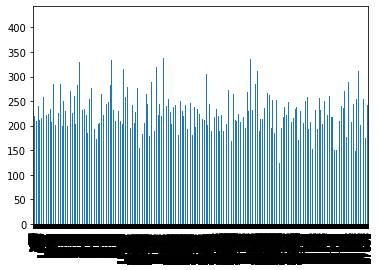

In [323]:
df_credit_data["score"].plot(kind="bar")

In [324]:
np.max(df_credit_data["score"])

421.54157213684573

In [325]:
np.min(df_credit_data["score"])

109.60404275046828

In [326]:
df_credit_data["improvement"]=None

In [332]:
for idx,row in df_credit_data.iterrows():
    df_credit_data.at[idx,"improvement"]=get_lowest_score(row)

In [334]:
df_credit_data["improvement"].value_counts()

risk_score          13295
roi_score           11341
investment_score     7432
credit_score         2840
time_score           2527
diversity_score       146
confidence_score      112
Name: improvement, dtype: int64

In [337]:
improvements=list(set(df_credit_data["improvement"]))

In [338]:
improvements

['diversity_score',
 'time_score',
 'risk_score',
 'credit_score',
 'confidence_score',
 'roi_score',
 'investment_score']

In [339]:
df_credit_data.head()

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,...,diversity_score,score,roi_score_sclaed,risk_score_sclaed,time_score_sclaed,confidence_score_sclaed,investment_score_sclaed,credit_score_sclaed,diversity_score_sclaed,improvement
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",...,0.2,267.433581,27.404910,50.526316,35.434783,40.372997,11.158622,52.535954,50.0,investment_score
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",...,0.2,168.518079,10.500419,17.894737,30.237154,27.570373,7.789989,24.525407,50.0,investment_score
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",...,0.2,169.170550,17.566548,0.000000,13.586957,25.735815,40.247035,22.034196,50.0,risk_score
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",...,0.2,201.577067,17.890841,15.789474,44.720497,33.804882,6.610108,32.761266,50.0,investment_score
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",...,0.2,265.712581,18.848303,31.578947,26.956522,51.798874,51.140334,35.389601,50.0,roi_score


In [345]:
 dict_cols=[col for col in df_credit_data.columns if "dict" in col]

In [347]:
df_credit_data[dict_cols]

,risk_score_dict,tenure_yr_dict,confidence_score_dict,diversity_score_dict
0,{3: 16},"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...","{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...","{'Others': 12, 'Debt Scheme': 2, 'Equity Schem..."
1,{1: 17},"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...","{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...","{'Others': 10, 'Debt Scheme': 4, 'Hybrid Schem..."
2,{0: 9},"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...","{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...","{'Others': 4, 'Debt Scheme': 3, 'Solution Sche..."
3,{1: 15},"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}","{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...","{'Others': 9, 'Hybrid Scheme': 3, 'Debt Scheme..."
4,{5: 6},"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}","{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...","{'Others': 5, 'Debt Scheme': 1}"
...,...,...,...,...
37688,{1: 13},"{9: 2, 7: 2, 18: 2, 16: 2, 15: 1, 10: 1, 8: 1,...","{6845: 16, 6945: 18, 6056: 15, 5518: 10, 14224...","{'Others': 10, 'Equity Scheme': 2, 'Debt Schem..."
37689,{4: 18},"{12: 4, 10: 4, 19: 2, 17: 2, 14: 2, 11: 2, 16:...","{17523: 19, 14785: 10, 13429: 12, 5850: 17, 17...","{'Others': 11, 'Debt Scheme': 4, 'Solution Sch..."
37690,{0: 18},"{15: 3, 14: 3, 6: 3, 12: 2, 11: 2, 18: 1, 13: ...","{9657: 14, 11300: 18, 14666: 12, 10788: 8, 181...","{'Others': 11, 'Debt Scheme': 3, 'Equity Schem..."
37691,{2: 8},"{14: 1, 13: 1, 12: 1, 9: 1, 7: 1, 6: 1, 18: 1,...","{15779: 7, 3609: 14, 18620: 12, 9280: 18, 1546...","{'Others': 5, 'Equity Scheme': 2, 'Solution Sc..."


In [351]:
df_credit_data["cumulative_tenure"]= df_credit_data["tenure_yr_dict"].apply(lambda x:np.sum([k*v for k,v in x.items()]))

In [352]:
df_credit_data["cumulative_inv_amount"]=df_credit_data["confidence_score_dict"].apply(lambda x:np.sum([k*v for k,v in x.items()]))

In [350]:
df_credit_data["cumulative_risk"]=df_credit_data["risk_score_dict"].apply(lambda x:np.sum([k*v for k,v in x.items()]))

In [353]:
df_credit_data["total_mfs"]=df_credit_data["diversity_score_dict"].apply(lambda x:np.sum([v for k,v in x.items()]))

In [355]:
df_credit_data["total_tenure"]=df_credit_data["tenure_yr_dict"].apply(lambda x:np.sum([k for k,v in x.items()]))

In [357]:
diversity_score_dict

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,...,confidence_score_sclaed,investment_score_sclaed,credit_score_sclaed,diversity_score_sclaed,improvement,cumulative_tenure,cumulative_inv_amount,cumulative_risk,total_mfs,total_tenure
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",...,40.372997,11.158622,52.535954,50.0,investment_score,213,2576727,48,16,123
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",...,27.570373,7.789989,24.525407,50.0,investment_score,208,1950971,17,17,136
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",...,25.735815,40.247035,22.034196,50.0,risk_score,90,973186,0,9,80
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",...,33.804882,6.610108,32.761266,50.0,investment_score,179,2059523,15,15,92
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",...,51.798874,51.140334,35.389601,50.0,roi_score,87,1214105,30,6,68


In [384]:
list_cols=[]

In [385]:
for mf in list(set(mf_df["mf_category"])):
    list_cols.append("mf_cat_"+mf.replace(" ","_").lower())
    df_credit_data["mf_cat_"+mf.replace(" ","_").lower()]=0

In [386]:
list_cols

['mf_cat_equity_scheme',
 'mf_cat_debt_scheme',
 'mf_cat_other_scheme',
 'mf_cat_hybrid_scheme',
 'mf_cat_solution_scheme',
 'mf_cat_others']

In [376]:
list(set(mf_df["mf_category"]))

['Equity Scheme',
 'Debt Scheme',
 'Other Scheme',
 'Hybrid Scheme',
 'Solution Scheme',
 'Others']

In [369]:
df_credit_data.drop(list_cols,axis=1,inplace=True)

In [387]:
for idx,row in df_credit_data.iterrows():
    for k,v in row["diversity_score_dict"].items():
        if k=="Equity Scheme":
            df_credit_data.at[idx,"mf_cat_equity_scheme"]=v
        elif k=="Debt Scheme":
            df_credit_data.at[idx,"mf_cat_debt_scheme"]=v
        elif k=="Other Scheme":
            df_credit_data.at[idx,"mf_cat_other_scheme"]=v
        elif k=="Hybrid Schem":
            df_credit_data.at[idx,"mf_cat_hybrid_scheme"]=v
        elif k=="Solution Scheme":
            df_credit_data.at[idx,"mf_cat_solution_scheme"]=v
        elif k=="Others":
            df_credit_data.at[idx,"mf_cat_others"]=v
    

In [388]:
df_credit_data.to_pickle("train_test_risk_score.pkl.bz2",compression="bz2")

In [389]:
df_credit_data.head()

,defaul_payment_hist,credit_history,open_acc,indebtedness,member_id,risk_score_dict,risk_score,tenure_yr_dict,time_score,confidence_score_dict,...,cumulative_inv_amount,cumulative_risk,total_mfs,total_tenure,mf_cat_equity_scheme,mf_cat_debt_scheme,mf_cat_other_scheme,mf_cat_hybrid_scheme,mf_cat_solution_scheme,mf_cat_others
0,0.0,10957.0,3,0.000000,786442,{3: 16},8.000000,"{13: 3, 19: 3, 10: 2, 16: 2, 15: 1, 12: 1, 9: ...",21.300000,"{15950: 19, 12399: 17, 4979: 12, 8629: 5, 8410...",...,2576727,48,16,123,2,2,0,0,0,12
1,0.0,5114.0,3,0.000000,655371,{1: 17},2.833333,"{12: 4, 17: 2, 13: 2, 6: 2, 19: 1, 18: 1, 16: ...",18.909091,"{11638: 18, 9128: 6, 3962: 5, 7671: 12, 3121: ...",...,1950971,17,17,136,1,4,0,0,0,10
2,0.0,4595.0,2,0.000000,917517,{0: 9},0.000000,"{10: 2, 15: 1, 14: 1, 12: 1, 11: 1, 7: 1, 6: 1...",11.250000,"{16437: 6, 12502: 11, 9545: 14, 7813: 5, 18339...",...,973186,0,9,80,0,3,1,0,1,4
3,35.0,6909.0,10,0.000000,786448,{1: 15},2.500000,"{12: 4, 8: 4, 11: 2, 16: 2, 10: 1, 18: 1, 17: 1}",25.571429,"{7562: 12, 17423: 10, 7005: 8, 4504: 11, 19231...",...,2059523,15,15,92,0,3,0,0,0,9
4,38.0,7426.0,15,17.468667,917526,{5: 6},5.000000,"{19: 2, 15: 1, 13: 1, 12: 1, 9: 1}",17.400000,"{5201: 13, 15406: 19, 6347: 12, 16443: 15, 196...",...,1214105,30,6,68,0,1,0,0,0,5


In [390]:
df_credit_data.drop(dict_cols,axis=1,inplace=True)

In [392]:
df_credit_data.head().T

,0,1,2,3,4
defaul_payment_hist,0,0,0,35,38
credit_history,10957,5114,4595,6909,7426
open_acc,3,3,2,10,15
indebtedness,0,0,0,0,17.4687
member_id,786442,655371,917517,786448,917526
risk_score,8,2.83333,0,2.5,5
time_score,21.3,18.9091,11.25,25.5714,17.4
confidence_score,161045,114763,108131,137301,202350
amount,180957,151353,98831,174366,80588
mf_return,1.90006e+07,6.16484e+06,6.68061e+06,1.20015e+07,5.84016e+06


In [393]:
score_cols=[col for col in df_credit_data.columns if "score" in col]

In [395]:
score_cols.remove("score")

In [396]:
score_cols

['risk_score',
 'time_score',
 'confidence_score',
 'roi_score',
 'investment_score',
 'credit_score',
 'diversity_score',
 'roi_score_sclaed',
 'risk_score_sclaed',
 'time_score_sclaed',
 'confidence_score_sclaed',
 'investment_score_sclaed',
 'credit_score_sclaed',
 'diversity_score_sclaed']

In [397]:
df_credit_data.drop(score_cols,axis=1,inplace=True)

In [399]:
df_credit_data.head().T

,0,1,2,3,4
defaul_payment_hist,0,0,0,35,38
credit_history,10957,5114,4595,6909,7426
open_acc,3,3,2,10,15
indebtedness,0,0,0,0,17.4687
member_id,786442,655371,917517,786448,917526
amount,180957,151353,98831,174366,80588
mf_return,1.90006e+07,6.16484e+06,6.68061e+06,1.20015e+07,5.84016e+06
balance,260478,221916,143652,254640,113281
score,267.434,168.518,169.171,201.577,265.713
improvement,investment_score,investment_score,risk_score,investment_score,roi_score


In [400]:
df_credit_data.to_pickle("./final_model/final_train_test_risk_score.pkl.bz2",compression="bz2")

In [401]:
df_credit_data.drop(["member_id"],axis=1,inplace=True)

In [402]:
df_credit_data

,defaul_payment_hist,credit_history,open_acc,indebtedness,amount,mf_return,balance,score,improvement,cumulative_tenure,cumulative_inv_amount,cumulative_risk,total_mfs,total_tenure,mf_cat_equity_scheme,mf_cat_debt_scheme,mf_cat_other_scheme,mf_cat_hybrid_scheme,mf_cat_solution_scheme,mf_cat_others
0,0.0,10957.0,3,0.000000,180957,19000616.36,260478.500000,267.433581,investment_score,213,2576727,48,16,123,2,2,0,0,0,12
1,0.0,5114.0,3,0.000000,151353,6164841.46,221915.500000,168.518079,investment_score,208,1950971,17,17,136,1,4,0,0,0,10
2,0.0,4595.0,2,0.000000,98831,6680605.95,143651.500000,169.170550,risk_score,90,973186,0,9,80,0,3,1,0,1,4
3,35.0,6909.0,10,0.000000,174366,12001470.54,254640.000000,201.577067,investment_score,179,2059523,15,15,92,0,3,0,0,0,9
4,38.0,7426.0,15,17.468667,80588,5840161.06,113281.313333,265.712581,roi_score,87,1214105,30,6,68,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37688,0.0,2710.0,8,0.000000,110667,3739580.42,163290.500000,166.717467,roi_score,157,1188616,13,13,107,2,1,0,0,0,10
37689,15.0,4840.0,7,0.000000,212375,22763660.05,313722.500000,272.436739,credit_score,235,2732357,72,18,108,1,4,0,0,1,11
37690,0.0,3137.0,9,0.000000,223860,14246657.65,332653.000000,162.408329,risk_score,209,2520730,0,18,116,2,3,1,0,0,11
37691,0.0,3318.0,4,0.000000,96389,7711657.10,141265.500000,171.056505,time_score,95,1150725,16,8,95,2,0,0,0,1,5


In [403]:
final_data =df_credit_data.copy(deep=True)

In [404]:
final_data.head()

,defaul_payment_hist,credit_history,open_acc,indebtedness,amount,mf_return,balance,score,improvement,cumulative_tenure,cumulative_inv_amount,cumulative_risk,total_mfs,total_tenure,mf_cat_equity_scheme,mf_cat_debt_scheme,mf_cat_other_scheme,mf_cat_hybrid_scheme,mf_cat_solution_scheme,mf_cat_others
0,0.0,10957.0,3,0.000000,180957,19000616.36,260478.500000,267.433581,investment_score,213,2576727,48,16,123,2,2,0,0,0,12
1,0.0,5114.0,3,0.000000,151353,6164841.46,221915.500000,168.518079,investment_score,208,1950971,17,17,136,1,4,0,0,0,10
2,0.0,4595.0,2,0.000000,98831,6680605.95,143651.500000,169.170550,risk_score,90,973186,0,9,80,0,3,1,0,1,4
3,35.0,6909.0,10,0.000000,174366,12001470.54,254640.000000,201.577067,investment_score,179,2059523,15,15,92,0,3,0,0,0,9
4,38.0,7426.0,15,17.468667,80588,5840161.06,113281.313333,265.712581,roi_score,87,1214105,30,6,68,0,1,0,0,0,5


In [407]:
df2.columns

Index(['emp_title_cat', 'home_ownership_cat', 'loan_status_cat', 'job_cat',
       'purpose_cat', 'application_type_cat', 'marital_cat', 'education_cat',
       'mf_preference_cat', 'scheme_type_cat', 'scheme_cat_cat',
       'scheme_sub_cat_cat', 'default_cat', 'housing_cat', 'loan_cat',
       'member_id', 'annual_inc', 'age', 'risk_profile', 'risk_score_x',
       'mf_id', 'amount', 'tenure_yr', 'scheme_name', 'Risk', 'popularity',
       'rank', 'risk_score_y', 'emp_length_val', 'term_val', 'payment_hist',
       'credit_used'],
      dtype='object')

In [408]:
final_data.columns

Index(['defaul_payment_hist', 'credit_history', 'open_acc', 'indebtedness',
       'amount', 'mf_return', 'balance', 'score', 'improvement',
       'cumulative_tenure', 'cumulative_inv_amount', 'cumulative_risk',
       'total_mfs', 'total_tenure', 'mf_cat_equity_scheme',
       'mf_cat_debt_scheme', 'mf_cat_other_scheme', 'mf_cat_hybrid_scheme',
       'mf_cat_solution_scheme', 'mf_cat_others'],
      dtype='object')

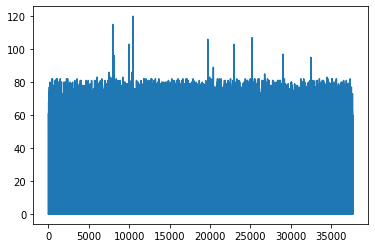

In [412]:
final_data["default_payment_hist"].plot(kind="line")

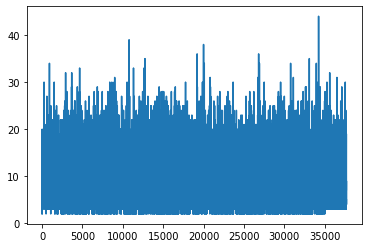

In [419]:
final_data["open_acc"].plot(kind="line")

In [430]:
final_cols=["default_payment_hist","last_pymnt_d","earliest_cr_line","open_acc","out_prncp_inv","funded_amnt_inv","amount","mf_return","balance","mf_id"]

In [431]:
final_data["default_payment_hist"].plot(kind="line")

['default_payment_hist',
 'last_pymnt_d',
 'earliest_cr_line',
 'open_acc',
 'out_prncp_inv',
 'funded_amnt_inv',
 'amount',
 'mf_return',
 'balance',
 'mf_id']

In [424]:
rename={"last_pymnt_d":"last_payment_date","earliest_cr_line":"first_loan_start_date","out_prncp_inv":"loan_payment_till_date","funded_amnt_inv":"total_loan",\
       "amount":"mutual_fund_amount","mf_return":"mutual_fund_return","balance":"account_balance","mf_id":"mutual_fund_id"}

In [429]:
final_data[final_cols]

KeyError: "['default_payment_hist', 'funded_amnt_inv', 'earliest_cr_line', 'last_pymnt_d', 'out_prncp_inv', 'mf_id'] not in index"

In [528]:
final_cols.append("tenure_yr")

In [530]:
final_cols

['last_pymnt_d',
 'earliest_cr_line',
 'open_acc',
 'out_prncp_inv',
 'funded_amnt_inv',
 'member_id',
 'member_id',
 'tenure_yr']

In [529]:
risk_user_data=user[final_cols]

KeyError: "['tenure_yr'] not in index"

In [433]:
user_mf_data=pd.read_csv("user_data_rand.csv.zip",compression="zip")

In [434]:
remove_Cols=['default_payment_hist', 'mf_return', 'balance', 'amount', 'mf_id']

In [435]:
final_cols = [e for e in final_cols if e not in remove_Cols]

In [460]:
other_cols.append("member_id")

In [452]:
cols_3=['defaul_payment_hist', 'mf_return', 'balance','member_id'] 

In [442]:
other_cols = [e for e in other_cols if e not in cols_3]

In [535]:
cols_3=['member_id',"mf_id","tenure_yr"]

In [533]:
user_mf_data["tenure_yr"]

0         13
1          6
2          5
3          8
4         19
          ..
377046     6
377047    17
377048    10
377049     6
377050    19
Name: tenure_yr, Length: 377051, dtype: int64

In [500]:
risk_user_data2=user_mf_data[other_cols]

In [536]:
risk_user_data3=df[cols_3]

In [485]:
risk_user_data4=df_credit_data[["member_id","balance"]]

In [492]:
risk_user_data4.shape

(37693, 2)

In [486]:
data_frames = [risk_user_data, risk_user_data2, risk_user_data3,risk_user_data4]

In [488]:
from functools import reduce

In [489]:
df_merged=reduce(lambda  left,right: pd.merge(left,right,on=['member_id'],
                                            how='inner'), data_frames)

In [491]:
df_merged.shape

(4900717, 11)

In [494]:
df_merged.head(5)

,last_pymnt_d,earliest_cr_line,open_acc,out_prncp_inv,funded_amnt_inv,member_id,amount,mf_id,defaul_payment_hist,mf_return,balance
0,2015-01-01,1985-01-01,3,0.0,4975.0,1296599,16153,101186,28.0,1696065.0,108776.0
1,2015-01-01,1985-01-01,3,0.0,4975.0,1296599,16153,101186,28.0,1871124.0,108776.0
2,2015-01-01,1985-01-01,3,0.0,4975.0,1296599,16153,101186,28.0,11489.0,108776.0
3,2015-01-01,1985-01-01,3,0.0,4975.0,1296599,16153,101186,28.0,485355.0,108776.0
4,2015-01-01,1985-01-01,3,0.0,4975.0,1296599,16153,101186,28.0,19289.0,108776.0


In [541]:
risk_user_data3.rename(columns={"mf_id":"mutual_fund_id"},inplace=True)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [542]:
df_final=df_final.merge(risk_user_data3,on=["member_id","mutual_fund_id"],how="inner")

In [524]:
df_final.rename(columns={"last_pymnt_d":"last_payment_date","earliest_cr_line":"first_loan_start_date","out_prncp_inv":"loan_payment_till_date","funded_amnt_inv":"total_loan",\
       "amount":"mutual_fund_amount","mf_return":"mutual_fund_return","balance":"account_balance","mf_id":"mutual_fund_id"},inplace=True)

In [544]:
df_final.rename(columns={"tenure_yr":"mutual_fund_held_since"},inplace=True)

In [501]:
risk_user_data2.head(3)

,amount,mf_id,member_id
0,16153,101186,1296599
1,4762,101186,1293387
2,9200,101186,1239172


In [504]:
risk_user_data3.head(3)

,defaul_payment_hist,mf_return,member_id,mf_id
0,28.0,1696065.00,1296599,101186
1,32.0,4476.28,1293387,101186
2,71.0,9200.00,1239172,101186


In [505]:
risk_user_data4.head(4)

,member_id,balance
0,786442,260478.5
1,655371,221915.5
2,917517,143651.5
3,786448,254640.0


In [545]:
df_final.to_pickle("test_train_scoring_data.pkl.bz2",compression="bz2")

In [546]:
import os

def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

print(get_size(), 'bytes')

1792245209 bytes


In [547]:
import shutil

total, used, free = shutil.disk_usage("/")

print("Total: %d GiB" % (total // (2**30)))
print("Used: %d GiB" % (used // (2**30)))
print("Free: %d GiB" % (free // (2**30)))

Total: 108 GiB
Used: 88 GiB
Free: 19 GiB


In [2]:
import lzma
import pickle

In [7]:
object_file = open("../PredictPlus/collaboration_matrix.pkl")

In [8]:
with lzma.open("../PredictPlus/collaboration_matrix.pkl.lmz", "wb") as f:
    pickle.dump(object_file, f)

TypeError: cannot serialize '_io.TextIOWrapper' object